# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — мы её уже сделали.

Необходимо построить модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
# Загружаем необходимые в работе библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import tree
from tqdm import tqdm

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

**Выводы по предварительному изучению данных:**
- имеем данные абонентов по количеству звонков, минут, отправленных сообщений, израсходованных мегабайт, факту подключения к тарифу "Ультра".
- пропусков в датасете нет. Тип данных позволит без ограничений провести необходимый анализ (преобразовывать нет необходимости).
- всего имеем 3214 записей данных абонентов, этого более, чем достаточно для анализа.
- по количеству звонков, минут, отправленных сообщений, израсходованных мегабайт (наши признаки для анализа) - данные очень сильно разнятся.
- касательно сбалансированности таргетов: к тарифу "Ультра" подключено всего 985 абонентов из 3214 (30,6%, несбалансирован)

## Разбейте данные на выборки

In [6]:
# Разделяем данные на свойства и цель
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']
# Делим выборки на Обучающие 60% и Тестовые
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4,
                                                                            random_state=12345, stratify=target)
# Тестовые выборки делим пополам, для получения Валидационных выборок
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)
print("Признаки в Обучающей выборке:", features_train.shape, "Цель Обучающей выборки:", target_train.shape)
print("Признаки в Валидационной выборке:", features_valid.shape, "Цель Валидационной выборки:", target_valid.shape)
print("Признаки в Тестовой выборке:", features_test.shape, "Цель Тестовой выборки:", target_test.shape)

Признаки в Обучающей выборке: (1928, 4) Цель Обучающей выборки: (1928,)
Признаки в Валидационной выборке: (643, 4) Цель Валидационной выборки: (643,)
Признаки в Тестовой выборке: (643, 4) Цель Тестовой выборки: (643,)


## Исследуйте модели

accuracy наилучшей модели на валидационной выборке: 0.80248833592535 Глубина дерева: 8


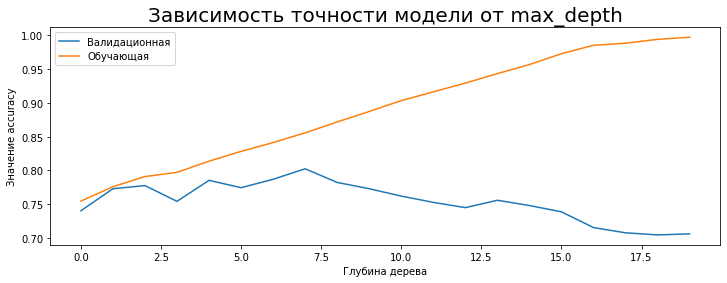

In [7]:
# Дерево решений
best_model_tree = None
best_accuracy_tree = 0
best_depth_tree = 0
list_train = []
list_valid = []
for depth in range(1,21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    
    predictions_train = model.predict(features_train)
    accuracy = accuracy_score(target_train, predictions_train)
    list_train.append(accuracy)
    
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    list_valid.append(accuracy)
    
    if accuracy > best_accuracy_tree:
        best_model_tree = model
        best_accuracy_tree = accuracy
        best_depth_tree = depth
print("accuracy наилучшей модели на валидационной выборке:", best_accuracy_tree, "Глубина дерева:", best_depth_tree)

#  на основании двух списков строим график
plt.figure(figsize=(12, 4))
plt.plot(list_valid, label = 'Валидационная')
plt.plot(list_train, label = 'Обучающая')
plt.title('Зависимость точности модели от max_depth', size=20)
plt.xlabel('Глубина дерева')
plt.ylabel('Значение accuracy')
plt.legend();

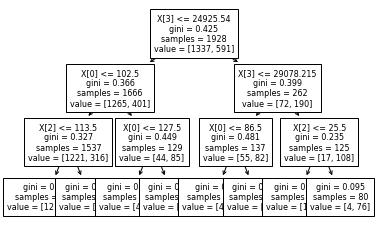

In [8]:
# Строим дерево
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
tr = model.fit(features_train, target_train)
tree.plot_tree(tr, fontsize=8);

In [9]:
%%time
# Случайный лес
best_model_forest = None
best_accuracy_forest = 0
best_est = 0
best_depth_forest = 0
for est in tqdm(range(1, 51)):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions_valid)
        if accuracy > best_accuracy_forest:
            best_model_forest = model
            best_accuracy_forest = accuracy
            best_est = est
            best_depth_forest = depth
print("accuracy лучшей модели 'Случайный лес' на валидац. выборке:", best_accuracy_forest, "Количество деревьев:",
      best_est, "Глубина деревьев:", best_depth_forest)

100%|██████████| 50/50 [00:30<00:00,  1.67it/s]

accuracy лучшей модели 'Случайный лес' на валидац. выборке: 0.8227060653188181 Количество деревьев: 39 Глубина деревьев: 9
CPU times: user 29.7 s, sys: 298 ms, total: 30 s
Wall time: 30 s


In [10]:
# Логистическая регрессия
model_regr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=10000)
model_regr.fit(features_train, target_train)
predictions_valid_regr = model_regr.predict(features_valid)
print("accuracy модели Логистической регрессии на валидационной выборке:", accuracy_score(target_valid, predictions_valid_regr))

accuracy модели Логистической регрессии на валидационной выборке: 0.7387247278382582


<div class="alert alert-info">
Выводы:
    
- Применили три вида моделей: "Дерево решений"(DT), "Случайный лес"(RF), и "Логистическая регрессия"(LR).
    
- В модели DT на валидации при увеличении глубины дерева - метрика качества стала снижаться, в то время, как на обучающей выборке она растёт. Это связано с переобучением модели (т.е. модель хорошо запомнила ответы, но не поняла сути)

- Наибольшая доля правильных ответов по метрике accuracy получилась с моделью "Случайный лес": 0,82, с 39 деревьями и глубиной 9. Это объяснимо, модели RF обычно показывают лучшие результаты: благодаря большому количеству независимых друг от друга деревьев и принятии решения на основе сравнения их результатов, это помогает улучшить результат предсказания и избежать переобучения.
    
- В модели LR слово «регрессия»  присутствует потому, что в процессе её обучения выявляется некая зависимость, устанавливающая соответствие между случайными переменными на входе. Таким способом решается задача классификации.
    
- Логистическая регрессия использует логистическую связь для соединения выходных и входных данных. В ней существует одна гладкая линейная граница принятия решения. Поэтому она показала нам результаты хуже, чем две другие модели.
</div>

<div class="alert alert-info">
Дообучим выбранную нами модель RF, на обучающей + валидационной выборке:
</div>

In [11]:
best_model_forest.fit(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid]));

## Проверьте модель на тестовой выборке

In [12]:
# Модель "Случайный лес"
predictions_test = best_model_forest.predict(features_test)
print('accuracy:', accuracy_score(target_test, predictions_test))

accuracy: 0.8289269051321928


<div class="alert alert-info">
На тестовой выборке, на Дообученной модели - результат получился даже лучше, чем на валидационной.
</div>

## (бонус) Проверьте модели на адекватность

Для проверки используем классификатор DummyClassifier.

In [13]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=12345)
model_dc.fit(features_train, target_train)
accuracy_dc = model_dc.score(features_valid, target_valid)
print('Accuracy DummyClassifier:', accuracy_dc)

Accuracy DummyClassifier: 0.6936236391912908


**Вывод**
Accuracy модели DummyClassifier (0.693) ниже, чем у нашей модели "Случайный лес" (0.829) - модель адекватна и эффективна.

<div class="alert alert-info">
Общий вывод
    
- Были исследованы модели  "Дерево решений", "Случайный лес", и "Логистическая регрессия";
    
- Наилучшую точность (accuracy = 0.827 на валидационной выборке) показала модель "Случайный лес" с гиперпараметрами: деревьев - 39, глубина деревьев - 9;
    
- Далее выбранная модель была дообучена, на объединённой выборке (тестовая + валидационная)
    
- Модели была проверена на тестовой выборке. Результат на дообученной модели теперь стал даже выше - Accuracy=0.8289;
- Модель проверена на вменяемость. Для проверки использовалась модель DummyClassifier, которая показала результат Accuracy - 0.693.
</div>